In [1]:
import pandas as pd

df_da = pd.read_csv("fbref/Big5DA1920.csv",header=[0,1])
df_sca = pd.read_csv("fbref/Big5SCA1920.csv",header=[0,1])

def rename_columns(df):
    new_cols = []
    for col in df.columns:
        if "Unnamed:" in col[0]:
            new_cols.append(col[1])
        else:
            new_cols.append(col[0] + " " + col[1])
    df.columns = new_cols
    df["Player"] = df["Player"].apply(lambda x: x.split("\\")[0])
    # df["Nation"] = df["Nation"].apply(lambda x: x.split(" ")[0])
    df = df.drop(columns=['Matches'])
    return df
    
df_da = rename_columns(df_da)
df_sca = rename_columns(df_sca)

In [2]:
# print(df_da.columns)
# print(df_sca.columns)
drop_cols = ['Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', '90s']
df_all = pd.concat([df_da, df_sca.drop(columns=drop_cols)], axis=1, ignore_index=True)
df_all.columns = df_da.columns.tolist() + df_sca.drop(columns=drop_cols).columns.tolist()
print(df_all.columns)

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', '90s',
       'Tackles Tkl', 'Tackles TklW', 'Tackles Def 3rd', 'Tackles Mid 3rd',
       'Tackles Att 3rd', 'Vs Dribbles Tkl', 'Vs Dribbles Att',
       'Vs Dribbles Tkl%', 'Vs Dribbles Past', 'Pressures Press',
       'Pressures Succ', 'Pressures %', 'Pressures Def 3rd',
       'Pressures Mid 3rd', 'Pressures Att 3rd', 'Blocks Blocks', 'Blocks Sh',
       'Blocks ShSv', 'Blocks Pass', 'Int', 'Tkl+Int', 'Clr', 'Err', 'Rk',
       'SCA SCA', 'SCA SCA90', 'SCA Types PassLive', 'SCA Types PassDead',
       'SCA Types Drib', 'SCA Types Sh', 'SCA Types Fld', 'GCA GCA',
       'GCA GCA90', 'GCA Types PassLive', 'GCA Types PassDead',
       'GCA Types Drib', 'GCA Types Sh', 'GCA Types Fld', 'GCA Types OG'],
      dtype='object')


In [3]:
df_mffw = df_all[(df_all["90s"]>=15) 
       & (df_all["Pos"].str.contains("MF") | 
          df_all["Pos"].str.contains("FW"))].copy()

In [96]:
df_mffw["Pressures Att 3rd 90"] = df_mffw["Pressures Att 3rd"] / df_mffw["90s"]
df_mffw["Pressures Mid 3rd 90"] = df_mffw["Pressures Mid 3rd"] / df_mffw["90s"]
df_mffw["SCA Types PassLive 90"] = df_mffw["SCA Types PassLive"] / df_mffw["90s"]
df_mffw["Pressures Mid Att 90"] = \
    (df_mffw["Pressures Att 3rd"] + df_mffw["Pressures Mid 3rd"])/ df_mffw["90s"]
df_mffw["Tackles Mid Att 90"] = \
    (df_mffw["Tackles Att 3rd"] + df_mffw["Tackles Mid 3rd"])/ df_mffw["90s"]
df_mffw["Blocks Pass 90"] = df_mffw["Blocks Pass"] / df_mffw["90s"]
df_mffw["Int 90"] = df_mffw["Int"] / df_mffw["90s"]
df_mffw["DA 90"] = (df_mffw["Pressures Press"]
                    + df_mffw["Blocks Blocks"] + df_mffw["Tkl+Int"])\
                   / df_mffw["90s"]
df_mffw["DA Mid Att 90"] = (df_mffw["Pressures Mid Att 90"]
                    + df_mffw["Blocks Pass 90"] + df_mffw["Tackles Mid Att 90"])


In [97]:
cols = ["Player","Squad","Age","Pos","90s",
        "DA 90","SCA Types PassLive 90"]
plot_df = df_mffw[((df_mffw["Pos"].str.contains("MF")) | 
                   (df_mffw["Squad"].str.contains("Arsenal"))) & (
    df_mffw["SCA Types PassLive 90"]>=1
    )]
plot_df[cols].sort_values(
    by=["DA 90","SCA Types PassLive 90"],
    ascending=False).head(50)

,Player,Squad,Age,Pos,90s,DA 90,SCA Types PassLive 90
1342,Konrad Laimer,RB Leipzig,22.0,MF,23.5,43.702128,1.744681
1436,Sean Longstaff,Newcastle Utd,21.0,MF,15.3,39.673203,1.241830
2148,Valentin Rongier,Marseille,24.0,MF,19.9,38.542714,2.010050
1497,Habib Maïga,Metz,23.0,MF,25.2,38.531746,1.190476
1080,Hernani,Parma,25.0,MF,26.3,37.338403,1.292776
2349,Dominic Solanke,Bournemouth,21.0,FWMF,18.3,37.267760,1.639344
879,Fred,Manchester Utd,26.0,MF,24.0,37.000000,2.666667
864,Lamine Fomba,Nîmes,21.0,MF,15.3,36.209150,1.176471
316,Jean-Paul Boëtius,Mainz 05,25.0,MF,25.2,35.674603,2.341270
1929,Mathias Pereira Lage,Angers,22.0,MF,17.1,35.672515,2.163743


In [6]:
df_mffw[(df_mffw["Player"]
    .str.contains("Partey")) | (
    df_mffw["Squad"]
    .str.contains("Arsenal")
    )][cols]

,Player,Squad,Age,Pos,90s,DA 90,SCA Types PassLive 90
136,Pierre-Emerick Aubameyang,Arsenal,30.0,FW,34.8,15.862069,1.091954
476,Dani Ceballos,Arsenal,22.0,MF,18.8,17.393617,1.702128
1016,Mattéo Guendouzi,Arsenal,20.0,MF,19.4,15.567010,1.340206
1337,Alexandre Lacazette,Arsenal,28.0,FW,20.8,21.442308,1.730769
1860,Mesut Özil,Arsenal,30.0,MF,16.0,16.000000,2.625000
1890,Thomas Partey,Atlético Madrid,26.0,MF,28.3,13.992933,1.307420
1925,Nicolas Pépé,Arsenal,24.0,FW,22.3,13.497758,1.704036
2191,Bukayo Saka,Arsenal,17.0,DFFW,19.5,12.000000,1.641026
2495,Lucas Torreira,Arsenal,23.0,MF,16.8,18.928571,1.130952
2666,Granit Xhaka,Arsenal,26.0,MF,28.7,12.334495,1.149826


In [7]:
df_mffw[(
    df_mffw["Squad"]
    .str.contains("Manchester City")
    )][cols]

,Player,Squad,Age,Pos,90s,DA 90,SCA Types PassLive 90
26,Sergio Agüero,Manchester City,31.0,FW,16.1,14.409938,1.739130
627,Kevin De Bruyne,Manchester City,28.0,MF,31.0,17.806452,5.064516
1031,İlkay Gündoğan,Manchester City,28.0,MF,22.4,11.696429,2.857143
1188,Gabriel Jesus,Manchester City,22.0,FW,22.6,20.176991,2.123894
1494,Riyad Mahrez,Manchester City,28.0,FW,21.6,18.564815,4.166667
2120,Rodri,Manchester City,23.0,MF,27.6,14.891304,2.065217
2303,Bernardo Silva,Manchester City,24.0,FWMF,22.6,19.026549,3.584071
2304,David Silva,Manchester City,33.0,MF,20.3,15.862069,4.334975
2387,Raheem Sterling,Manchester City,24.0,FW,29.5,14.033898,2.779661


In [8]:
df_mffw[cols].mean()

Age                      25.954058
90s                      23.318836
DA 90                    17.093167
SCA Types PassLive 90     1.765845
dtype: float64

428


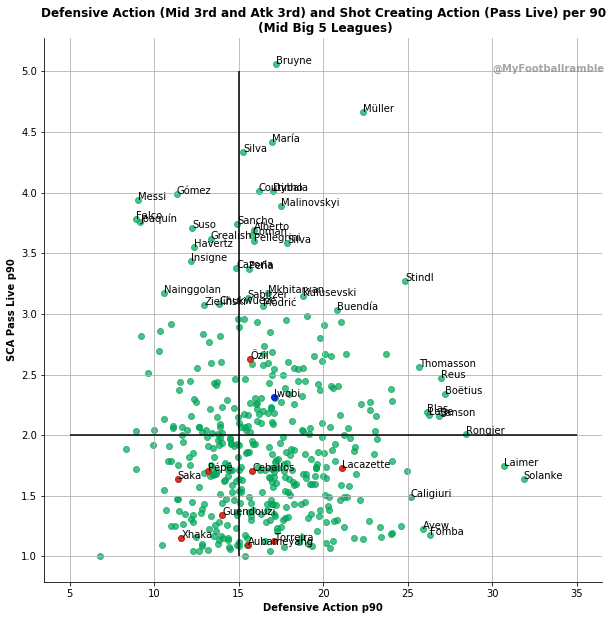

In [119]:
import matplotlib.pyplot as plt
import numpy as np

print(len(plot_df))
x = plot_df["DA Mid Att 90"].values
y = plot_df["SCA Types PassLive 90"].values
# print(npxGpSh.max())
# print(npxGcon.max())

fig, ax = plt.subplots(figsize=(10, 10))
fig.set_facecolor("white")
ax.scatter(x, y, alpha=0.7, color='#00A658')
ax.set_xlabel('Defensive Action p90',fontweight="bold")
ax.set_ylabel('SCA Pass Live p90',fontweight="bold")
ax.set_title('Defensive Action (Mid 3rd and Atk 3rd) and Shot Creating Action (Pass Live) per 90\n (Mid Big 5 Leagues)',fontweight="bold")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(True)
# ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
for x1, y1, c1,t1,a1 in zip(x,y,plot_df["Squad"].values,
                         plot_df["Player"].values,
                         plot_df["Age"].values):
    if c1=="Arsenal":
        ax.scatter(x1, y1, alpha=0.7, color='r')
        ax.annotate(t1.split(" ")[-1], (x1, y1))
    if  (y1>3) | ((y1>2.5) & (x1>30)) \
            | (x1>25):
        ax.annotate(t1.split(" ")[-1], (x1, y1))
    if ("Iwobi" in t1):
        ax.scatter(x1, y1, alpha=0.7, color='b')
        ax.annotate(t1.split(" ")[-1], (x1, y1))

ax.annotate("@MyFootballramble", (30,5),fontweight="bold",alpha=0.7,c="grey")
ax.hlines(2,5,35)
ax.vlines(15,1,5)
# plt.show()
plt.savefig("Defensive Action and Shot Creating Action per 90 (Mid and Atk Big 5 Leagues).png",dpi=300)